## Project Description:

#### General Instruction
- There will be two datasets for this project—one for classification models and the second for regression models. 
- Read data into Jupyter notebook use pandas to import data into a data frame. 
- Your submission should be commented on appropriately. Use the markdown cells in the iPython notebook to prepare your final report. 
- Fifty percent of the grade is based on your Python code submission. The other 50 percent of your grade is based on the evaluation score of the prediction. 
- The exam should be syntax error-free. Run your code before the final submission. 

#### Required Tasks
- Explore each data set using different descriptive and plotting methods. 
- Explore each dataset, check for missing data and apply proper data imputation methods. 
- Apply the same preprocessing techniques on the classification_test and regression_test. Note that these two datasets don't have target columns. 
- Scale each dataset. Explain your choice of data scaling method. 
- Apply clustering methods discussed in class to study the structure of each dataset. Discuss how the outcome of clustering will help you better understand the structure of data. Provide result interpretation for each clustering model. 
- Regression dataset: Apply all the regression models you have learned in this class. Discuss the results and outcomes. Models with hyperparameters explain how you find the best value of the hyperparameters. 
- Find the best regression model among the list of models trained on the regression_train dataset. Use this model to predict the target values of the regression_test. 
- Classification dataset: Apply all the classification models you have learned in this course. Discuss the results and outcomes. Discuss the choice of evaluation method and how it helps you find the best values of the model hyperparameters. 
- Find the best classification model among the list of models trained on the classification_train dataset. Use this model to predict the target values of the classification_test. 


#### Devliverable
Submit ONLY the iPython notebook or the .py file of your work. Use the following frame for your submission. Please don't remove the headers in the following structure. 

Make sure to list the name and student id of all the group members in your iPython notebook file. 

#### Rubric
| Descriptio | Fair | Good | excelent |
|:-----------|:------|:------|:----------|
|Preprocessing|Demonstrate limited understanding of preprocessing steps | Demonstrate a moderate ability to find a way to apply the preprocessing step to prepare the dataset for Machine learning models | Demonstrate the ability to choose the appropriate preprocessing model to prepare the dataset |
|learning model | Demonstrate limited understanding of methods used to train learning models | Demonstrate the ability to understand techniques used to train learning models with some effectiveness. This includes optimization algorithms, initialization, regularization, and hyperparameter search methods | Demonstrate ability to understand and apply various algorithms as well as initialization, regularization, and hyperparameter search methods |
|Final prediction |Demonstrate limited understanding of strategies to structure and end to end machine learning project | Demonstrate ability to understand classic ML strategies such as error analysis, data split, data collection and evaluation metric selection with some effectiveness | Demonstrates ability to structure the project and apply methods such as error analysis, data split, data collection, design a labeling process and select proper evaluation metrics to improve performance.

# Classification

## Data preparation

In [1]:
# Information of all the libraries and imports in the project
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Create a dataframe from csv file
df = pd.read_csv('train_classification.csv')
df_test = pd.read_csv('test_classification.csv')

print('Columns with missing values: ', df.columns[df.isnull().any()].tolist())

Columns with missing values:  ['ALB', 'ALP', 'ALT', 'CHOL', 'PROT']


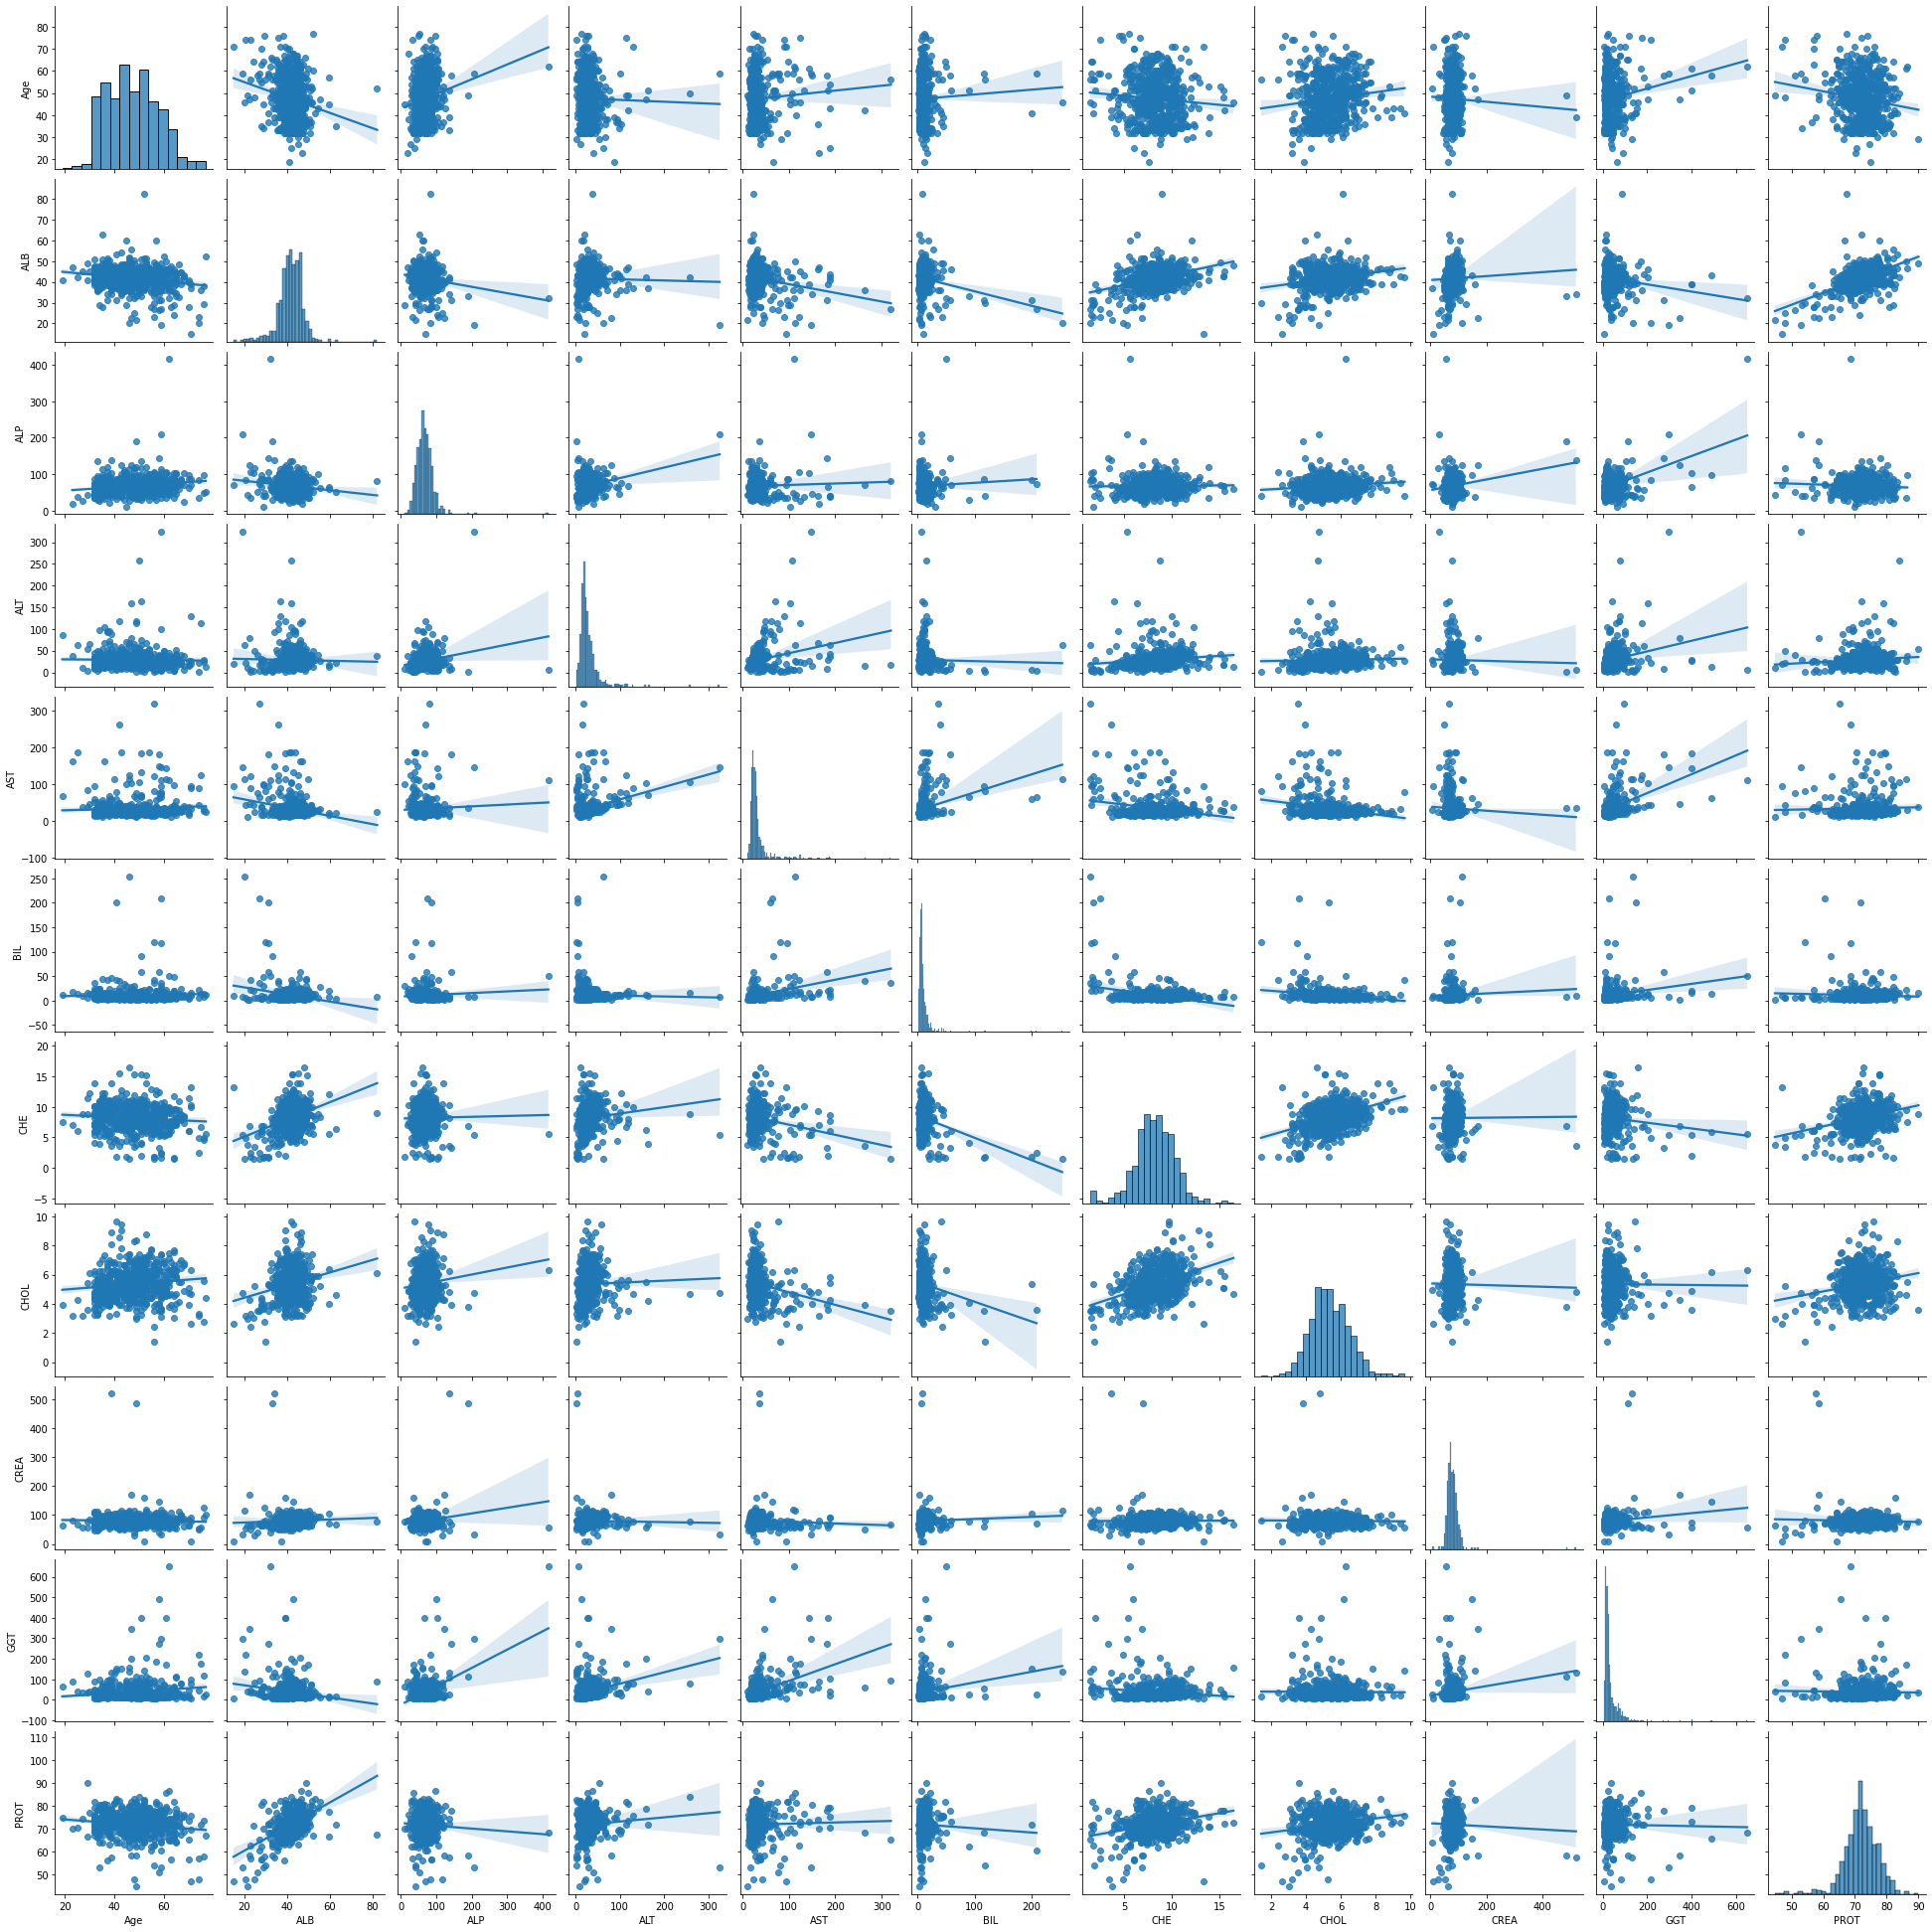

In [2]:
# Pairplot to understand the dataset

sns.pairplot(df, kind='reg')

### Univariate analysis on column 'ALP'        
#### ALP: Majority of the data lies in one place. Seems like mean or median of the column will be useful to fill the missing values.

<function matplotlib.pyplot.show(close=None, block=None)>

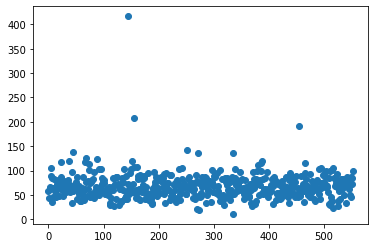

In [3]:
plt.scatter(df.index, df['ALP'])
plt.show

### Univariate analysis on column 'ALB'        
#### ALB: Majority of the data lies in one place. Seems like mean of the column may be useful to fill the missing values.
#### The missing value is in row 198, that row has 3 missing values in total. It can be considered as an outlier and can be dropped.

array([[<AxesSubplot:title={'center':'ALB'}>]], dtype=object)

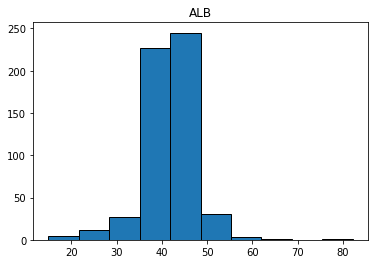

In [4]:
df.hist(column='ALB', grid=False, edgecolor='black')

### Univariate analysis on column 'ALT'        
#### ALT: Some data is scattered on the plane and there are a few outliers.

<function matplotlib.pyplot.show(close=None, block=None)>

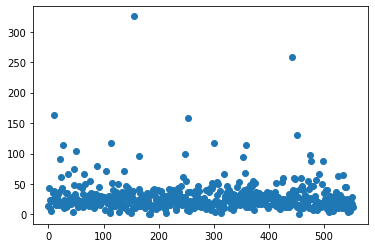

In [5]:
plt.scatter(df.index, df['ALT'])
plt.show

### Univariate analysis on column 'CHOL'        
#### CHOL: The kde plot shows almost a normal distribution. Any of mean/median/mode are good choices to fill the missing values in the column. 

<AxesSubplot:xlabel='CHOL', ylabel='Density'>

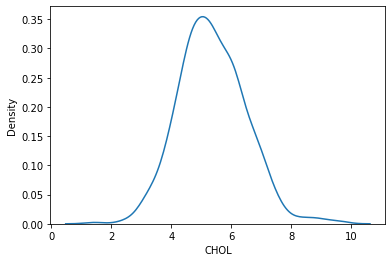

In [6]:
sns.kdeplot(df['CHOL'])

### Univariate analysis on column 'PROT'        
#### PROT: Maximum of the data is towards one side of the box plot.
#### The missing value is in row 244, that row has 3 missing values in total. It can be considered as an outlier and can be dropped.

<AxesSubplot:>

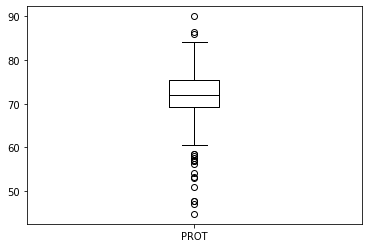

In [7]:
df.boxplot(column=['PROT'], grid=False, color='black')

In [8]:
# To know the pearson correlation between the columns and to interpret useful information from it

abs(df.corr(method ='pearson'))

,Age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
Age,1.000000,0.199236,0.177125,0.020332,0.065623,0.039799,0.088432,0.123560,0.034772,0.149509,0.149893
ALB,0.199236,1.000000,0.140429,0.023768,0.216342,0.223995,0.374621,0.222591,0.049883,0.160224,0.551526
ALP,0.177125,0.140429,1.000000,0.216901,0.044271,0.057271,0.017133,0.113322,0.168757,0.448915,0.059359
ALT,0.020332,0.023768,0.216901,1.000000,0.283856,0.022740,0.119539,0.030898,0.020756,0.260672,0.083803
AST,0.065623,0.216342,0.044271,0.283856,1.000000,0.304753,0.229531,0.230059,0.054703,0.457885,0.029853
BIL,0.039799,0.223995,0.057271,0.022740,0.304753,1.000000,0.313143,0.191539,0.045250,0.181287,0.052709
CHE,0.088432,0.374621,0.017133,0.119539,0.229531,0.313143,1.000000,0.423798,0.006769,0.116039,0.290826
CHOL,0.123560,0.222591,0.113322,0.030898,0.230059,0.191539,0.423798,1.000000,0.015382,0.008268,0.206742
CREA,0.034772,0.049883,0.168757,0.020756,0.054703,0.045250,0.006769,0.015382,1.000000,0.131176,0.037427
GGT,0.149509,0.160224,0.448915,0.260672,0.457885,0.181287,0.116039,0.008268,0.131176,1.000000,0.018758


#### We didn't find any useful information based on correlation between the columns. 

#### Data Preprocessing Approaches:
#### Approach-1: There were totally 29 missing values in the dataset. Out of which, 2 of the rows has 3 missing values each. Those two rows can be considered as outliers and hence we can drop them. The leftout missing values can be filled using either mean/median/mode based on our univariate analysis. The leftout missing values can also be filled using KNNImputer.

#### Approach-2: Drop the rows with missing values.

#### Based on our analysis, Dropping the rows with missing values seems to be a better option for this case.

In [9]:
#Pandas dropna with threshold didn't work. So, I had to write my own method.
def myVersionOfdropNa(df, threshold):
    indexes = df.loc[pd.isna(df).any(1), :].index
    for i in range(len(indexes)):
        if (df.loc[[indexes[i]]].isna().sum().sum() > threshold):
            print('Dropping row with index number', indexes[i])
            df.drop(indexes[i], inplace=True)

def transformData(df):
    df.replace(r'^\s*$', np.nan, regex=True)
#     myVersionOfdropNa(df, 1)

#     alp ="ALP"
#     alp_median = df[alp].median()
#     df[alp].replace(np.NaN,alp_median,True)

#     alb ="ALB"
#     alb_mean = df[alb].mean()
#     df[alb].replace(np.NaN,alb_mean,True)

#     alt ="ALT"
#     alt_median = df[alt].median()
#     df[alt].replace(np.NaN,alt_median,True)

#     chol ="CHOL"
#     chol_median = df[chol].median()
#     df[chol].replace(np.NaN,chol_median,True)

#     prot ="PROT"
#     prot_mean = df[prot].mean()
#     df[prot].replace(np.NaN,prot_mean,True)

    df.dropna(inplace=True)    
    
    high_freq_sex = df["Sex"].value_counts().index.tolist()[0]
    low_freq_sex = df["Sex"].value_counts().index.tolist()[1]
    df["Sex"].replace([high_freq_sex,low_freq_sex],[1,0],True)
    

def getFeatureSet(df):
    return df[['Age', 'Sex', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT']]

def scaleFeatureSet(X):
    scaler = StandardScaler()
    scaler.fit(X)
    X_scaled = scaler.transform(X)
    return pd.DataFrame(X_scaled, columns = X.columns)

# # Data Preprocessing for 'train_classification.csv' data set   
transformData(df)

# Data Preprocessing for 'test_classification.csv' data set   
transformData(df_test)

In [10]:
# Scale train ('train_classification.csv') dataset
X = getFeatureSet(df)

y = df['Category']

# X_scaled = scaleFeatureSet(X)   


# Scale test ('test_classification.csv') dataset
X_test = getFeatureSet(df_test)

# X_test_scaled = scaleFeatureSet(X_test) 

### Classification Model Training and Evaluation

In [11]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.20, random_state = 0)

#### Depedent variable in the given dataset is categorical. Logistic regression excepts the depedent variable to have only two categories or classes. We can either transform our depedent variable to have only two categories or We can use multinomial logistic regression for this case. When the dependent variable has more than two categories, we can then use multinomial logistic regression.

#### We used `newton-cg` solver for this case with max iterations set to `500` 

In [12]:
lreg = LogisticRegression(multi_class="multinomial", random_state= 0, max_iter = 500, solver='newton-cg')
lreg.fit(X_train, y_train)

LogisticRegression(max_iter=500, multi_class='multinomial', random_state=0,
                   solver='newton-cg')

In [13]:
print('train score:', lreg.score(X_train, y_train))
print('valid score:', lreg.score(X_valid, y_valid))

train score: 0.9929078014184397
valid score: 0.9528301886792453


In [14]:
pred = lreg.predict(X_valid)

print("Accuracy: {:.3f}".format(accuracy_score(y_valid, pred)))
print("Confusion matrix:\n{}".format(confusion_matrix(y_valid, pred)))

Accuracy: 0.953
Confusion matrix:
[[94  0  0  0  0]
 [ 0  1  0  0  0]
 [ 0  0  2  1  0]
 [ 0  0  3  0  0]
 [ 0  0  1  0  4]]


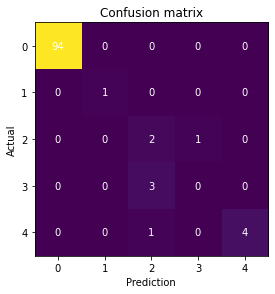

In [15]:
%matplotlib inline
confusion = confusion_matrix(y_valid, pred)

fig, ax = plt.subplots()
plt.imshow(confusion)
plt.title("Confusion matrix")

ax.set_xticks(np.arange(len(confusion)))
ax.set_yticks(np.arange(len(confusion[0])))

# Loop over data dimensions and create text annotations.
for i in range(len(confusion)):
    for j in range(len(confusion[0])):
        text = ax.text(j, i, confusion[i, j], ha="center", va="center", color="w")
        
fig.tight_layout()
plt.xlabel('Prediction')
plt.ylabel('Actual') 
plt.show()

In [16]:
print('Accuracy: ', accuracy_score(y_valid, pred))
print('Macro precision: ', precision_score(y_valid, pred, average= 'macro', zero_division=0))
print('Micro precision: ', precision_score(y_valid, pred, average= 'micro', zero_division=0))
print('Macro recall: ', recall_score(y_valid, pred, average= 'macro'))
print('Micro recall: ', recall_score(y_valid, pred, average= 'micro'))
print('Macro f1-score: ', f1_score(y_valid, pred, average= 'macro'))
print('Micro f1-score: ', f1_score(y_valid, pred, average= 'micro'))

Accuracy:  0.9528301886792453
Macro precision:  0.6666666666666667
Micro precision:  0.9528301886792453
Macro recall:  0.6933333333333334
Micro recall:  0.9528301886792453
Macro f1-score:  0.6666666666666667
Micro f1-score:  0.9528301886792453


### Classification Prediction

#### Below is the prediction of dependent variable values for the dataset `test_classification.csv`

In [17]:
lreg.predict(X_test)

array(['0=Blood Donor', '0=Blood Donor', '0=Blood Donor', '0=Blood Donor',
       '0=Blood Donor', '3=Cirrhosis', '0=Blood Donor', '0=Blood Donor',
       '0=Blood Donor', '0=Blood Donor', '0=Blood Donor', '0=Blood Donor',
       '0=Blood Donor', '0=Blood Donor', '0=Blood Donor', '0=Blood Donor',
       '0=Blood Donor', '0=Blood Donor', '0=Blood Donor', '0=Blood Donor',
       '3=Cirrhosis', '0=Blood Donor', '0=Blood Donor', '3=Cirrhosis',
       '0=Blood Donor', '0=Blood Donor', '0=Blood Donor', '0=Blood Donor',
       '0=Blood Donor', '0=Blood Donor', '0=Blood Donor', '0=Blood Donor',
       '0=Blood Donor', '0=Blood Donor', '0=Blood Donor', '0=Blood Donor',
       '0=Blood Donor', '0=Blood Donor', '0=Blood Donor', '0=Blood Donor',
       '0=Blood Donor', '3=Cirrhosis', '0=Blood Donor', '0=Blood Donor',
       '0=Blood Donor', '0=Blood Donor', '0=Blood Donor', '0=Blood Donor',
       '0=Blood Donor', '0=Blood Donor', '0=Blood Donor', '0=Blood Donor',
       '1=Hepatitis', '0=Blood Do

In [18]:
lreg.predict_proba(X_test)

array([[1.00000000e+000, 6.87004403e-014, 9.52144954e-022,
        9.12001112e-021, 7.00545126e-030],
       [9.99139695e-001, 8.60275102e-004, 2.67394946e-008,
        2.89373027e-009, 4.66930722e-023],
       [9.99999999e-001, 6.82284311e-010, 1.57499477e-012,
        8.43005022e-012, 2.08680622e-022],
       [9.99999999e-001, 5.61337484e-010, 5.81861848e-015,
        5.45667426e-015, 7.20657334e-019],
       [1.00000000e+000, 2.78165445e-012, 4.87142109e-015,
        4.04527980e-015, 5.15726832e-019],
       [1.17435785e-052, 1.88297241e-053, 1.32134345e-038,
        3.45024387e-030, 1.00000000e+000],
       [9.99999657e-001, 3.09220344e-011, 1.11778654e-007,
        2.31449645e-007, 1.10035740e-015],
       [9.99994494e-001, 5.50567506e-006, 3.00442556e-013,
        1.23270071e-011, 1.12894215e-015],
       [9.99998997e-001, 1.00265806e-006, 2.23242386e-014,
        2.31617247e-012, 6.54606864e-021],
       [9.91369866e-001, 8.63013393e-003, 7.59848012e-021,
        8.37062200e-016

## Decision Tree 

#### Used DecisionTreeClassifier on the given dataset to understand the behavior. 

#### There is an overfit in this case. We tried using early stopping methods to reduce the same.

In [19]:
dt = DecisionTreeClassifier(random_state = 0)
dt.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(dt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(dt.score(X_valid, y_valid)))

Accuracy on training set: 1.000
Accuracy on test set: 0.896


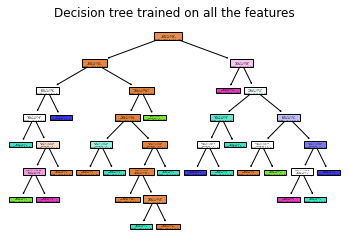

In [20]:
plt.figure()
plot_tree(dt, filled=True)
plt.title("Decision tree trained on all the features")
plt.show()

### Early Stopping: ``max_depth``

In [21]:
dt = DecisionTreeClassifier(random_state = 0, max_depth = 4)
dt.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(dt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(dt.score(X_valid, y_valid)))

Accuracy on training set: 0.972
Accuracy on test set: 0.906


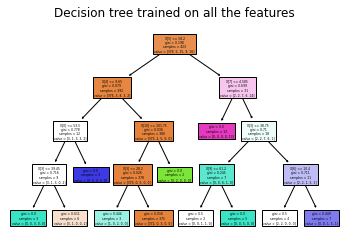

In [22]:
plt.figure()
plot_tree(dt, filled=True)
plt.title("Decision tree trained on all the features")
plt.show()

### Early Stopping: ``min_samples_split``

In [23]:
dt = DecisionTreeClassifier(random_state = 0, min_samples_split= 32)
dt.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(dt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(dt.score(X_valid, y_valid)))

Accuracy on training set: 0.931
Accuracy on test set: 0.896


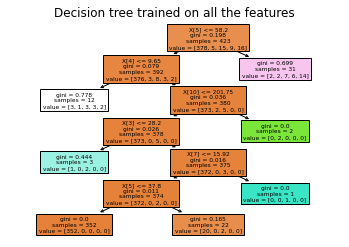

In [24]:
plt.figure()
plot_tree(dt, filled=True)
plt.title("Decision tree trained on all the features")
plt.show()

### Early Stopping: ``min_impurity_decrease``

In [25]:
dt = DecisionTreeClassifier(random_state = 0, min_impurity_decrease= 0.001)
dt.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(dt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(dt.score(X_valid, y_valid)))

Accuracy on training set: 0.995
Accuracy on test set: 0.915


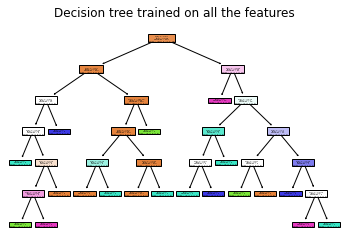

In [26]:
plt.figure()
plot_tree(dt, filled=True)
plt.title("Decision tree trained on all the features")
plt.show()

#### Approach-1 of data preparation with some minor changes and improvements can help fetch more beneficial results. 

#### Based on our analysis, We see that the multinomial logistic regression is a best suite for this case than using a decision tree classifier. 

# Work Logs

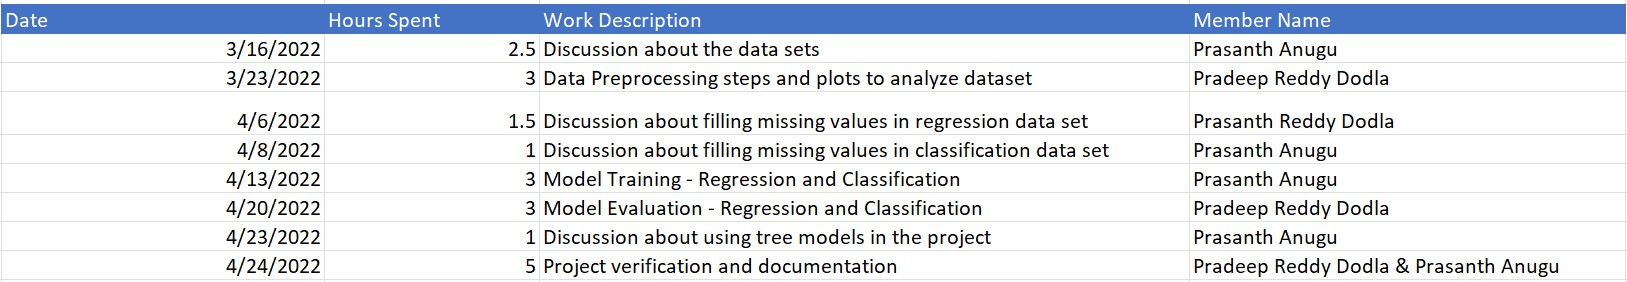